In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

In [2]:
with open(f'../../../loss/ResDepth_lr_tuning_loss_v2.pkl', 'rb') as f:
        experiment_data = pickle.load(f)

In [3]:
df = pd.DataFrame.from_dict(
    experiment_data,
    orient='index',
    columns=['learning_rate', 'weight_decay', 'epoch_min_val_loss', 'min_val_loss']
)

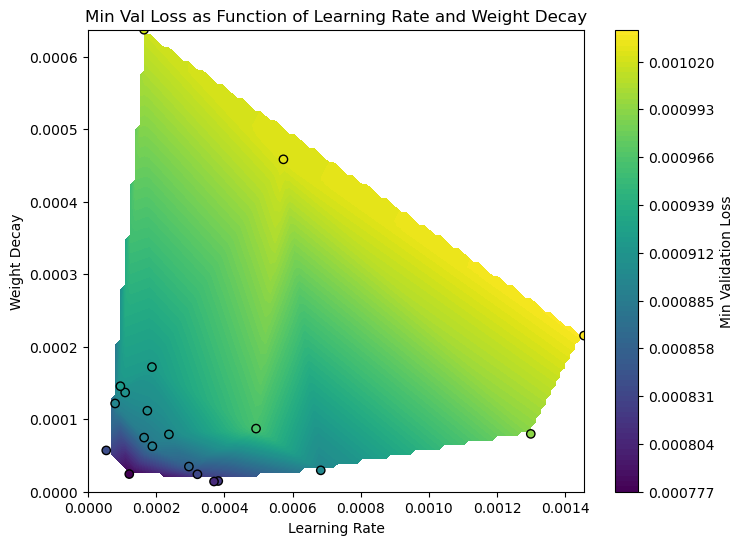

In [4]:
# Extract data
x = df['learning_rate'].values
y = df['weight_decay'].values
z = df['min_val_loss'].values

# Define grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Contour plot
c = ax.contourf(xi, yi, zi, levels=100, cmap='viridis')

# Overlay scatter points
scatter = ax.scatter(x, y, c=z, cmap='viridis', edgecolor='k')

# Labels and colorbar
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Weight Decay')
ax.set_title('Min Val Loss as Function of Learning Rate and Weight Decay')
ax.set_xlim(0)
ax.set_ylim(0)
fig.colorbar(c, ax=ax, label='Min Validation Loss')

Text(0.5, 1.0, 'Min Validation Loss vs. Weight Decay')

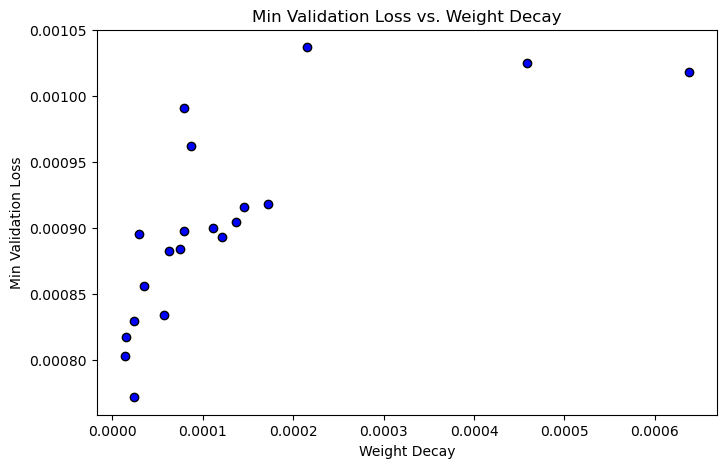

In [5]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot
ax.scatter(df['weight_decay'], df['min_val_loss'], c='blue', edgecolor='k')

# Labels and title
ax.set_xlabel('Weight Decay')
ax.set_ylabel('Min Validation Loss')
ax.set_title('Min Validation Loss vs. Weight Decay')

In [7]:
df

,learning_rate,weight_decay,epoch_min_val_loss,min_val_loss
0,0.000493,0.000087,40,0.000962
1,0.000573,0.000459,52,0.001025
2,0.000237,0.000079,51,0.000898
3,0.001455,0.000215,16,0.001037
4,0.000188,0.000172,59,0.000918
5,0.000189,0.000063,51,0.000883
6,0.000382,0.000015,38,0.000817
7,0.000053,0.000057,99,0.000834
8,0.000109,0.000137,54,0.000904
9,0.000121,0.000024,145,0.000772


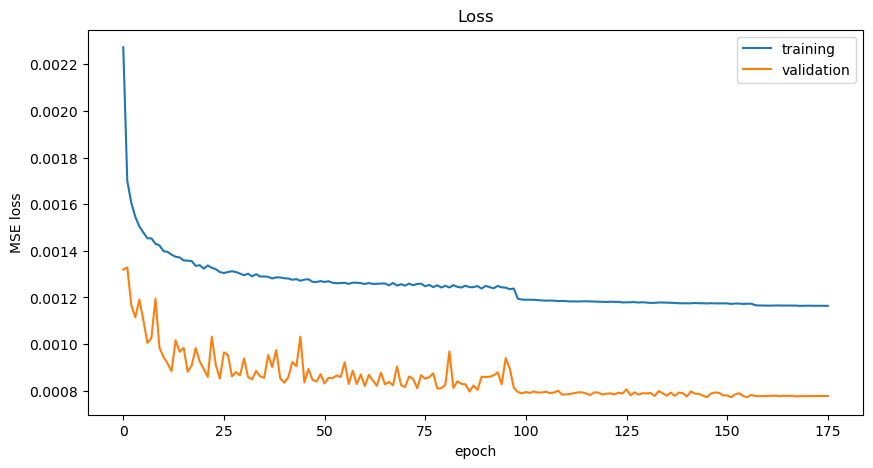

In [8]:
with open(f'../../../loss/ResDepth_lr0.00012099611034064781_weightdecay2.4358149728791014e-05_val_loss.pkl', 'rb') as f:
        val_loss = pickle.load(f)

with open(f'../../../loss/ResDepth_lr0.00012099611034064781_weightdecay2.4358149728791014e-05_train_loss.pkl', 'rb') as f:
        train_loss = pickle.load(f)


# plot loss over all epochs
f, ax = plt.subplots(figsize=(10,5))
ax.plot(train_loss, label='training')
ax.plot(val_loss, label='validation')
ax.set_xlabel('epoch')
ax.set_ylabel('MSE loss')
ax.set_title('Loss')
ax.legend()

# # save figure
# plt.savefig(f'../../../figs/quinn_ResDepth_v12_loss.png', dpi=300)